In [2]:
import os
import io
import IPython.display
from PIL import Image
import base64
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())  # read local .env file
hf_api_key = os.environ['HF_API_KEY']

In [4]:
import requests, json
from IPython.display import display, Image  # 确保导入正确的 Image 类

# Text-to-image endpoint
def get_completion(inputs, parameters=None,
                   ENDPOINT_URL="https://api-inference.huggingface.co/models/stable-diffusion-v1-5/stable-diffusion-v1-5"):
    headers = {
        "Authorization": f"Bearer {hf_api_key}",
        "Content-Type": "application/json"
    }
    data = {"inputs": inputs}
    if parameters is not None:
        data.update({"parameters": parameters})
    response = requests.request("POST",
                                ENDPOINT_URL,
                                headers=headers,
                                data=json.dumps(data))
    
    return response.content  # 返回图像的二进制数据



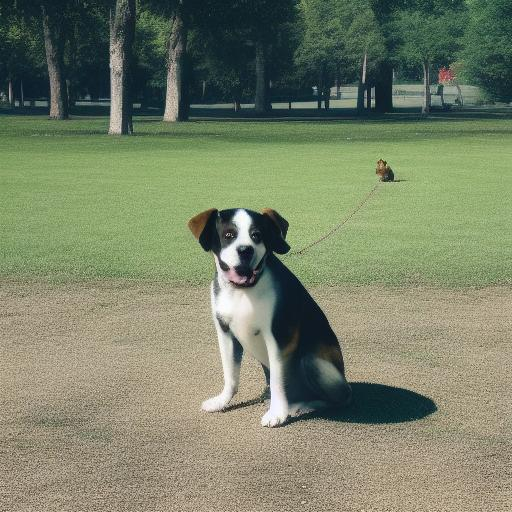

In [8]:
prompt = "a dog in a park"

# 获取图像的二进制数据
image_data = get_completion(prompt)

# 在 Jupyter 中显示图像
display(Image(data=image_data))  # 使用 IPython.display.Image 类

In [10]:
import gradio as gr
from PIL import Image as PILImage


def generate(prompt):
    output = get_completion(prompt)
    pil_image = PILImage.open(io.BytesIO(output))
    return pil_image


demo = gr.Interface(fn=generate,
                    inputs=[gr.Textbox(label="您的提示")],
                    outputs=[gr.Image(label="结果")],
                    title="使用 Stable Diffusion 生成图像",
                    description="生成任何图像",
                    allow_flagging="never",
                    examples=["the spirit of a tamagotchi wandering in the city of Vienna",
                              "a mecha robot in a favela"])

demo.launch()

D:\Anaconda\Lib\site-packages\gradio\interface.py:393: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [12]:
import gradio as gr
from PIL import Image as PILImage


def generate(prompt, negative_prompt, steps, guidance, width, height):
    params = {
        "negative_prompt": negative_prompt,
        "num_inference_steps": steps,
        "guidance_scale": guidance,
        "width": width,
        "height": height
    }

    output = get_completion(prompt, params)
    pil_image = PILImage.open(io.BytesIO(output))
    return pil_image


demo = gr.Interface(fn=generate,
                    inputs=[
                        gr.Textbox(label="Your prompt"),
                        gr.Textbox(label="Negative prompt"),
                        gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                                  info="In how many steps will the denoiser denoise the image?"),
                        gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                                  info="Controls how much the text prompt influences the result"),
                        gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512),
                        gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512),
                    ],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never"
                    )

demo.launch()

D:\Anaconda\Lib\site-packages\gradio\interface.py:393: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


In [16]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    prompt = gr.Textbox(label="Your prompt")
    with gr.Row():
        with gr.Column():
            negative_prompt = gr.Textbox(label="Negative prompt")
            steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                              info="In many steps will the denoiser denoise the image?")
            guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                                 info="Controls how much the text prompt influences the result")
            width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
            height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
            btn = gr.Button("Submit")
        with gr.Column():
            output = gr.Image(label="Result")

    btn.click(fn=generate, inputs=[prompt, negative_prompt, steps, guidance, width, height], outputs=[output])

demo.launch()

* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [20]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    with gr.Row():
        with gr.Column(scale=4):
            prompt = gr.Textbox(label="Your prompt")
        with gr.Column(scale=1, min_width=50):
            btn = gr.Button("Submit")
    with gr.Accordion("Advanced options", open=False):
        negative_prompt = gr.Textbox(label="Negative prompt")
        with gr.Row():
            with gr.Column():
                steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25)
                guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7)
            with gr.Column():
                width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
                height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
    output = gr.Image(label="Result")

    btn.click(fn=generate, inputs=[prompt, negative_prompt, steps, guidance, width, height], outputs=[output])

demo.launch()

* Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.
